## The tools that I used in this process:
I used Python(version 2.7), with some data-science related packages like pandas, NumPy and scikit-learn. I simply installed a specific distribution of Python called Anaconda that already bundles those and other most useful libraries for data science.

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

In [25]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

#### Reding *data.csv* with pandas:

In [2]:
data = pd.read_csv('data.csv',index_col=0)

In [3]:
data.head()

,feature1,feature2,feature3,feature4,feature5,response
feature0,,,,,,
0,79.238912,142.521180,83.203680,37.251610,-10.135911,0
1,57.399469,74.782256,12.070260,34.322600,55.482167,1
2,33.516311,76.885951,33.253356,48.988555,69.364048,2
3,32.935693,86.202320,48.548763,42.298201,34.603077,2
4,75.350393,138.191571,75.757699,30.216984,-9.227141,0


Let's have a look at some simple statistics of the **data**:

In [31]:
data.describe()

,feature1,feature2,feature3,feature4,feature5,response
count,101010.000000,101010.000000,101010.000000,101010.000000,101010.000000,101010.000000
mean,55.260527,98.095357,156.296064,38.419451,17.517145,1.000000
std,315.326145,319.631928,31835.520972,36.054187,318.906931,0.816501
min,0.016221,14.914621,-32.369763,-21.224100,-62.965050,0.000000
25%,36.221386,68.220958,18.506533,25.065156,-7.484190,0.000000
50%,50.517651,83.271721,62.100800,36.333816,20.837380,1.000000
75%,73.552712,137.111876,77.102605,51.228244,38.001835,2.000000
max,99999.000000,101010.000000,10111000.000000,9999.000000,101010.000000,2.000000


**max** values of the features seem very big comparing to **mean**, **25**, **50** and **75** percentiles. Investigating the the histogram of the data can help us to spot if there are any outliers:

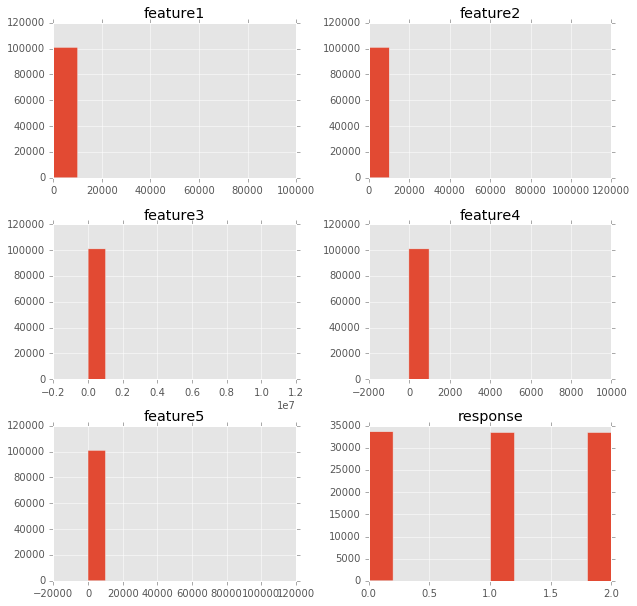

In [28]:
data.hist(figsize=(10,10));

Looks like there are some **extreme outliers** in all the features

### Selecting *features* and *the response*:

In [30]:
features = [u'feature1', u'feature2', u'feature3', u'feature4', u'feature5']
X = data[features]
y = data['response']

In [7]:
def factor_scatter_matrix(df, factor, palette=None):
    '''Create a scatter matrix of the variables in df, with differently colored
    points depending on the value of df[factor].
    inputs:
        df: pandas.DataFrame containing the columns to be plotted, as well 
            as factor.
        factor: string or pandas.Series. The column indicating which group 
            each row belongs to.
        palette: A list of hex codes, at least as long as the number of groups.
            If omitted, a predefined palette will be used, but it only includes
            9 groups.
    '''
    import matplotlib.colors
    import numpy as np
    from pandas.tools.plotting import scatter_matrix
    from scipy.stats import gaussian_kde

    if isinstance(factor, basestring):
        factor_name = factor #save off the name
        factor = df[factor] #extract column
        df = df.drop(factor_name,axis=1) # remove from df, so it 
        # doesn't get a row and col in the plot.

    classes = list(set(factor))

    if palette is None:
        palette = ['#e41a1c', '#377eb8', '#4eae4b', 
                   '#994fa1', '#ff8101', '#fdfc33', 
                   '#a8572c', '#f482be', '#999999']

    color_map = dict(zip(classes,palette))

    if len(classes) > len(palette):
        raise ValueError('''Too many groups for the number of colors provided.
We only have {} colors in the palette, but you have {}
groups.'''.format(len(palette), len(classes)))

    colors = factor.apply(lambda group: color_map[group])
    axarr = scatter_matrix(df,figsize=(10,10),marker='o',c=colors,diagonal=None)


    for rc in xrange(len(df.columns)):
        for group in classes:
            y = df[factor == group].icol(rc).values
            gkde = gaussian_kde(y)
            ind = np.linspace(y.min(), y.max(), 1000)
            axarr[rc][rc].plot(ind, gkde.evaluate(ind),c=color_map[group])

    return axarr, color_map

In [8]:
axarr, color_map = factor_scatter_matrix(X[1:10000],y[1:10000]);

/Users/user/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:44: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]


In [9]:
data.boxplot(by='response');

In [10]:
data_test = data[data.feature1<1000]
data_test = data_test[data_test.feature2<1000]
data_test = data_test[data_test.feature3<1000]
data_test = data_test[data_test.feature4<1000]
data_test = data_test[data_test.feature5<1000]

In [11]:
----data_test.describe()

,feature1,feature2,feature3,feature4,feature5,response
count,101003.000000,101003.000000,101003.000000,101003.000000,101003.000000,101003.000000
mean,54.271273,97.095817,51.598118,38.320458,16.517908,1.000010
std,23.235613,36.724728,32.225078,17.823604,26.918931,0.816486
min,0.016221,14.914621,-32.369763,-21.224100,-62.965050,0.000000
25%,36.222403,68.218940,18.504928,25.064747,-7.483637,0.000000
50%,50.517238,83.271411,62.098792,36.333380,20.837865,1.000000
75%,73.552655,137.111422,77.100748,51.227015,38.001464,2.000000
max,135.055901,193.999421,132.637529,104.838178,91.947545,2.000000


In [12]:
data_test.boxplot(by='response')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114ed9950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115142450>]], dtype=object)

In [13]:
print np.median(data['feature1'])

50.5176508066


In [14]:
feat = data.columns[:-1]

for feat.tolist()dddd

In [15]:
data_test.hist(figsize=(10,10));

as we seee....

In [16]:
y_test = data_test['response']
X_test = data_test[[0,1,2,3,4]]
axarr, color_map = factor_scatter_matrix(X_test,y_test);

/Users/user/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:44: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]


In [17]:
rf_model = RandomForestClassifier(n_estimators=1000, # Number of trees
                                  max_features=5,    # Num features considered
                                  oob_score=True)

In [18]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=1, random_state=0)
scores = cross_val_score(clf, X, y,cv=5)
scores.mean()

0.99777249777249766

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
fitted = clf.fit(X_train,y_train)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test,fitted.predict(X_test),labels=[0, 1, 2])

array([[11061,     0,     1],
       [    0, 11088,    29],
       [    1,    47, 11107]])

In [23]:
print confusion_matrix

<function confusion_matrix at 0x112df9668>
